In [ ]:
import pandas as pd
import math
import plotly.express as px
pd.options.plotting.backend = "plotly"

dont execute this part of the notebook it was just used to set up the data frame and left for the reader to see the different operation that have been applied to the data 

In [3]:
data = pd.read_csv("../Data/quotes.csv")

In [4]:
data = data[data['section'].notna()]

In [5]:
for ind in data.index:
    
    if 'vaud-region' in data['section'][ind]:
        data['section'][ind]='vaud-region'

D:\Miniconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
for ind in data.index:
    if 'sport' in  data['section'][ind]:
        data['section'][ind]='sport'

D:\Miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
data

,speaker,speaker_index,quote,quote_index,verb,verb_index,quote_token_count,quote_type,is_floating_quote,reference,speaker_gender,article_id,complexity,length,section
0,Marc Ogorek,"(1377, 1388)",ne pas faire tout cela par plaisir,"(1396, 1430)",assure,"(1389, 1395)",6.0,SVC,False,Marc Ogorek,male,100020966494,4.000000,34,geneve/grand-geneve
1,Cheveux frisés et sourcils broussailleux,"(2955, 2996)","qu’en temps normal, il réalise trois quarts de...","(3079, 3210)",explique,"(3070, 3078)",23.0,SVC,False,Cheveux frisés et sourcils broussailleux,unknown,100020966494,5.600000,131,geneve/grand-geneve
2,l’un d’eux,"(3401, 3411)","""Mais au-delà, c’est toute la réciprocité des ...","(3310, 3395)",dit,"(3397, 3400)",18.0,QCQVS,False,l’un d’eux,unknown,100020966494,4.733333,85,geneve/grand-geneve
3,qui,"(1095, 1098)",L’hôpital de Genève vous remercie!,"(980,1014)",NaN,NaN,5.0,QCQVS,False,NaN,unknown,100020966494,6.000000,34,geneve/grand-geneve
4,-il,"(1547, 1550)",tonne en direction des manifestants une autom...,"(1015,1517)",NaN,NaN,80.0,QCQVS,False,NaN,male,100020966494,5.423077,502,geneve/grand-geneve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72251,Nicolás Maduro,"(1062, 1076)",", a poursuivi Nicolás Maduro. Dans une rhétori...","(1047,1169)",poursuivi,"(1052, 1061)",19.0,QCQVS,False,Nicolás Maduro,male,999947843532,5.666667,120,monde
72252,Caracas,"(782, 789)",Une trentaine de personnes ont également été a...,"(633,775)",NaN,NaN,142.0,selon,False,Caracas,unknown,999947843532,4.958333,142,monde
72253,le renseignement militaire colombien,"(1826, 1862)","Ces groupes sans commandement unifié, financés...","(1680,1819)",NaN,NaN,139.0,selon,False,le renseignement militaire colombien,unknown,999947843532,5.363636,139,monde
72254,Bogotá,"(2439, 2445)",Plus de 3000 personnes se sont réfugiées en Co...,"(2351,2432)",NaN,NaN,81.0,selon,False,Bogotá,unknown,999947843532,4.857143,81,monde


In [8]:
for ind in data.index:
    if 'genève' in  data['section'][ind]:
        data['section'][ind]='geneve'

D:\Miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#data.to_csv('../Data/dataframe for viz.csv')

# Selecting the top 20 sections ordered by number of articles and renaming some columns 

In [9]:
sections=data['section'].value_counts()[:20].index.tolist()

In [10]:
data_for_viz=data.loc[data['section'].isin(sections)]


In [11]:
data_for_viz=data_for_viz.rename(columns={ "speaker_gender": "genre"})

In [12]:
data_for_viz_male=data_for_viz[data_for_viz['genre'] == 'male']
data_for_viz_female=data_for_viz[data_for_viz['genre'] == 'female']

In [13]:
data_for_viz_male.shape[0]

15565

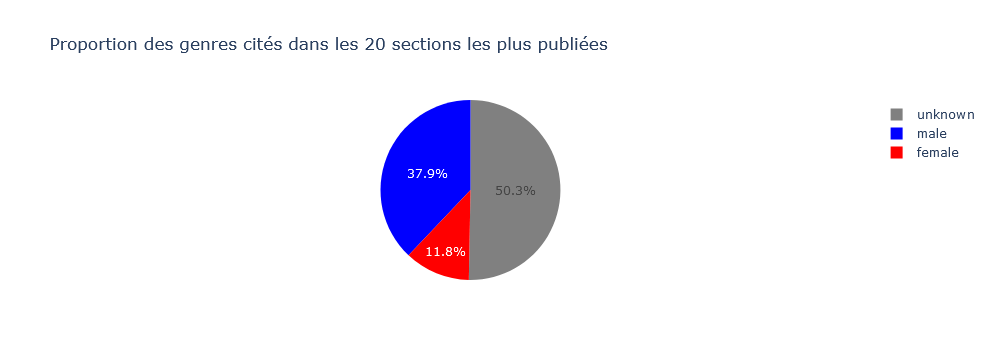

In [16]:
d = {'genre': ['female', 'male', 'unknown'], 'nombre de quote': [data_for_viz_female.shape[0], data_for_viz_male.shape[0],data_for_viz.shape[0]-data_for_viz_male.shape[0]-data_for_viz_female.shape[0]]}
d = pd.DataFrame(data=d)
fig = px.pie(d, values='nombre de quote', names='genre',title='Proportion des genres cités dans les 20 sections les plus publiées',color='genre' ,color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.show()

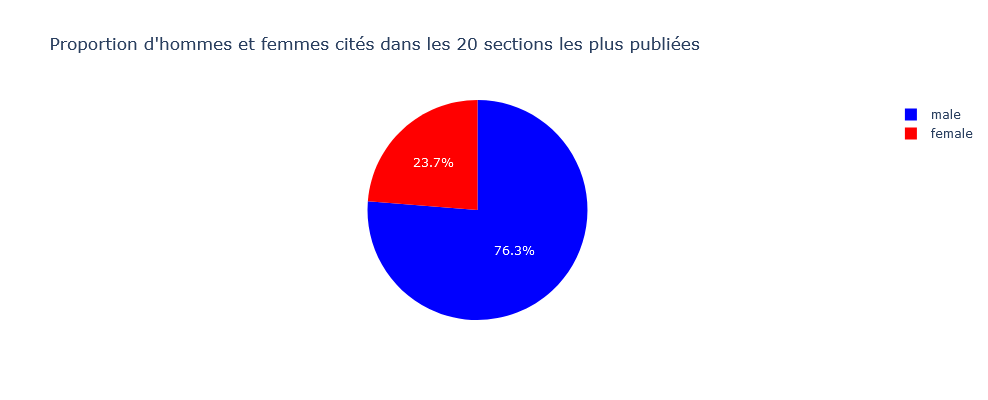

In [30]:
fig = px.pie(d[d['genre']!='unknown'], values='nombre de quote', names='genre',title='Proportion d\'hommes et femmes cités dans les 20 sections les plus publiées',color='genre' ,color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.update_layout(
    autosize=True,
    width=650,
    height=400,)
fig.show()

# plot for the average length as a function of the gender and the section

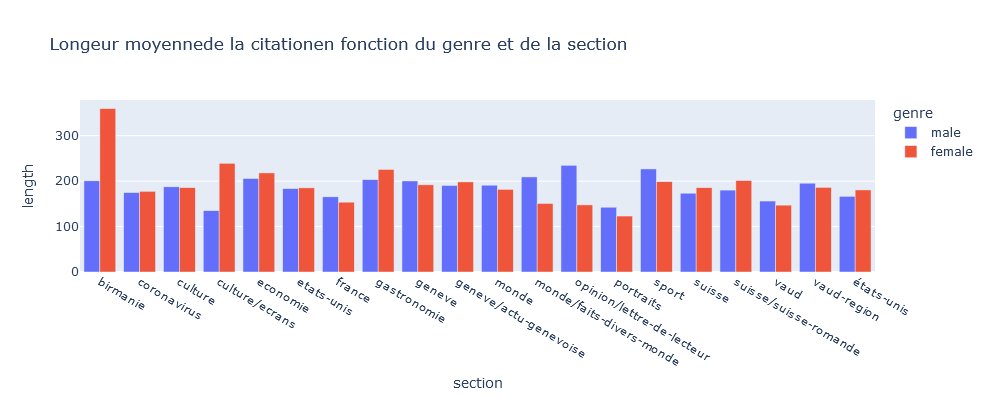

In [33]:
f=pd.DataFrame(data_for_viz_female[["section", "length"]].groupby("section").length.mean())
m=pd.DataFrame(data_for_viz_male[["section", "length"]].groupby("section").length.mean())
m['genre']='male'
f['genre']='female'
stat=pd.concat([m,f])
stat['section'] = stat.index
fig=px.bar(stat, x="section", y="length",
             color='genre',title='Longeur moyenne de la citationen fonction du genre et de la section', barmode='group',
             height=400)
fig.show()

#  plot for the average complexity as a function of the gender and the section

In [17]:
 f=pd.DataFrame(data_for_viz_female[["section", "complexity"]].groupby("section").complexity.mean())
m=pd.DataFrame(data_for_viz_male[["section", "complexity"]].groupby("section").complexity.mean())
m['genre']='male'
f['genre']='female'
stat=pd.concat([m,f])
stat['section'] = stat.index
fig=px.bar(stat, x="section", y="complexity",
             color='genre', barmode='group',
             height=400)
fig.show()

# plot of the percentage of men and women in each section

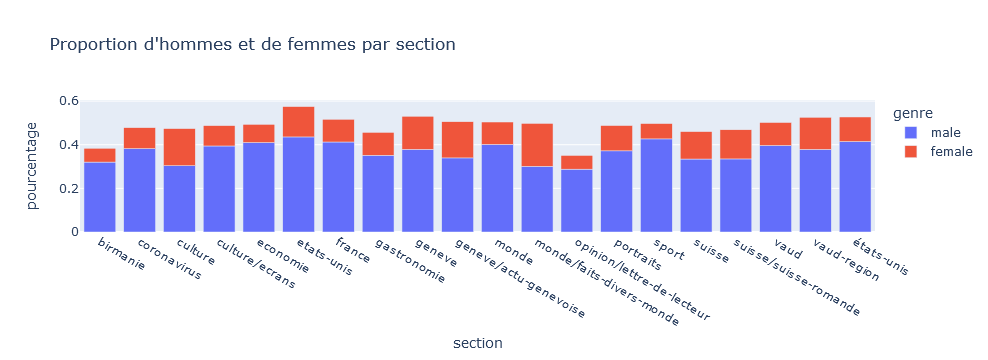

In [34]:
perncent_per_cat=data_for_viz.groupby('section')['genre'].value_counts(normalize=True).reset_index(name='perc')
perncent_per_cat = perncent_per_cat[perncent_per_cat['genre']!='unknown']
perncent_per_cat=perncent_per_cat.rename(columns={"perc": "pourcentage"})
fig = px.bar(perncent_per_cat, x="section", y="pourcentage", color="genre", title="Proportion d'hommes et de femmes par section")
fig.show()

# étude sur les articles les plus longs et plus courts  

nous allons refaire ces analyses sur les 2000 articles les plus longs et les plus cours (environs les 25% plus long articles et les 25% plus courts) 

In [19]:
import html2text

In [20]:
article = pd.read_csv ("../Data/article data.csv")
article = article[article['text'].notna()]
article['text']=article['text'].map(lambda x: html2text.html2text(x))
article['text']=article['text'].map(lambda x: x.replace("\n", " "))
article=article.drop_duplicates(subset=['externalid'], keep='last')
article=article.drop_duplicates(subset=['text'], keep='last')

In [21]:
article['length']=''
for ind in article.index:
    article['length'][ind]=len(article['text'][ind])

C:\Users\torge\AppData\Local\Temp/ipykernel_16708/1893489287.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
article=article.sort_values(by='length',ascending=False)
long=article.head(2000)
short=article.sort_values(by='length',ascending=True).head(2000)
long_list=long.index.to_list()
short_list=short.index.to_list()
data_for_viz_long=data_for_viz[data_for_viz.index.isin(long_list)]
data_for_viz_short=data_for_viz[data_for_viz.index.isin(short_list)]

In [23]:
data_for_viz_long_male=data_for_viz_long[data_for_viz_long['genre'] == 'male']

data_for_viz_short_male=data_for_viz_short[data_for_viz_short['genre'] == 'male']

data_for_viz_long_female=data_for_viz_long[data_for_viz_long['genre'] == 'female']

data_for_viz_short_female=data_for_viz_short[data_for_viz_short['genre'] == 'female']

# plots for the average length as a function of the gender and the section in the 2000 longest and shortest articles

In [24]:
f=pd.DataFrame(data_for_viz_long_female[["section", "length"]].groupby("section").length.mean())

m=pd.DataFrame(data_for_viz_long_male[["section", "length"]].groupby("section").length.mean())

m['genre']='male'

f['genre']='female'

stat=pd.concat([m,f])

stat['section'] = stat.index

fig=px.bar(stat, x="section", y="length",title='longeur moyenne des citations en fonction du genre et de la section dans les 2000 articles les plus longs ',
             color='genre', barmode='group',
             height=400)



fig.show()

In [25]:
f=pd.DataFrame(data_for_viz_short_female[["section", "length"]].groupby("section").length.mean())

m=pd.DataFrame(data_for_viz_short_male[["section", "length"]].groupby("section").length.mean())

m['genre']='male'

f['genre']='female'

stat=pd.concat([m,f])

stat['section'] = stat.index

fig=px.bar(stat, x="section", y="length",title='longeur moyenne des citations en fonction du genre et de la section dans les 2000 articles les plus courts ',
             color='genre', barmode='group',
             height=400)



fig.show()

# Proportion of male and female in the 2000 shortest and longest articles

In [26]:
d = {'genre': ['female', 'male', 'unknown'], 'nombre de quote': [data_for_viz_short_female.shape[0], data_for_viz_short_male.shape[0],data_for_viz_short.shape[0]-data_for_viz_short_male.shape[0]-data_for_viz_short_female.shape[0]]}
df = pd.DataFrame(data=d)

fig = px.pie(df, values='nombre de quote', names='genre',title='Proportion des genres cités dans les 2000 articles les plus courts',color='genre',color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.show()


fig = px.pie(df[df['genre']!='unknown'], values='nombre de quote', names='genre',title='Proportion des genres cités dans les 2000 articles les plus courts',color='genre',color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.show()


In [27]:
d = {'genre': ['female', 'male', 'unknown'], 'nombre de quote': [data_for_viz_long_female.shape[0], data_for_viz_long_male.shape[0],data_for_viz_long.shape[0]-data_for_viz_long_male.shape[0]-data_for_viz_long_female.shape[0]]}
df = pd.DataFrame(data=d)

fig = px.pie(df, values='nombre de quote', names='genre',title='Proportion des genres cités dans les 2000 articles les plus longs',color='genre',color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.show()


fig = px.pie(df[df['genre']!='unknown'], values='nombre de quote', names='genre',title='Proportion des genres cités dans les 2000 articles les plus longs',color='genre',color_discrete_map={'male':'blue',
                                 'female':'red',
                                 'unknown':'grey'
                                 })
fig.show()

# Vizualisation des femmes et des hommes les plus cité dans la section Vaud region

In [28]:
df = data_for_viz[data_for_viz['section']=='vaud-region']

In [29]:
df=df[df['genre']=='female']

In [30]:
df=df[df['speaker']!='elle']
df=df[df['speaker']!='Elle']
df=df[df['speaker']!='Elles']
df=df[df['speaker']!='-elle']

In [31]:
df.speaker.groupby([df['speaker']]).count().astype(int).sort_values(ascending=False).head(20).plot.bar()

In [32]:
a=set(df['speaker'])

In [33]:
len(a)

319

In [34]:
df2 = data_for_viz[data_for_viz['section']=='vaud-region']
df2=df2[df2['genre']=='male']

In [35]:
df2=df2[df2['speaker']!='il']
df2=df2[df2['speaker']!='ils']
df2=df2[df2['speaker']!='Ils']
df2=df2[df2['speaker']!='Il']
df2=df2[df2['speaker']!='-il']
df2=df2[df2['speaker']!='-ils']
df2=df2[df2['speaker']!='lui']
df2=df2[df2['speaker']!='le syndic']

In [36]:
df2.speaker.groupby([df2['speaker']]).count().astype(int).sort_values(ascending=False).head(20).plot.bar()

### Regarder quelle position il faut avoir pour être très cité, pour les hommes et les femmes